# PIK3CA: Effects of Hotspot Mutation on PIK3R1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

### Import CPTAC

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [4]:
protein = 'PIK3R1'
gene = 'PIK3CA'

## Extract the data for hotspot mutations only 

In [27]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.E545A', 'p.E545K', 'p.E545V', 'p.Q546P', 'p.Q546R', 'p.E542K']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']


Empty DataFrame
Columns: [Patient_Id, Gene, Mutation, Location, Clinical_Patient_Key]
Index: []


In [29]:
mutations = somatic.loc[(somatic['Gene'] == gene)]
print(mutations)

      Patient_Id    Gene           Mutation        Location  \
160    C3L-00006  PIK3CA  Missense_Mutation         p.E545K   
1147   C3L-00032  PIK3CA  Missense_Mutation         p.E545K   
1426   C3L-00139  PIK3CA  Missense_Mutation         p.Q546P   
1574   C3L-00143  PIK3CA  Missense_Mutation         p.R115L   
2260   C3L-00156  PIK3CA  Missense_Mutation         p.L628R   
2261   C3L-00156  PIK3CA  Missense_Mutation        p.T1025A   
3417   C3L-00161  PIK3CA  Missense_Mutation          p.R38C   
3418   C3L-00161  PIK3CA  Missense_Mutation         p.V344M   
4648   C3L-00362  PIK3CA  Missense_Mutation        p.H1047R   
4756   C3L-00563  PIK3CA  Missense_Mutation         p.G118D   
4757   C3L-00563  PIK3CA  Missense_Mutation         p.E545V   
7216   C3L-00586  PIK3CA  Missense_Mutation          p.F83S   
7217   C3L-00586  PIK3CA  Missense_Mutation          p.R88Q   
7218   C3L-00586  PIK3CA  Missense_Mutation         p.K111N   
7219   C3L-00586  PIK3CA  Missense_Mutation        p.Y1

In [28]:
p10_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)
print(len(p10_mutations.loc[(p10_mutations['Within_Hotspot'] == True)]))

        IRS1           Mutation Patient_Type
S001 -0.2270  Missense_Mutation        Tumor
S002 -0.7930           Wildtype        Tumor
S003 -0.0297  Missense_Mutation        Tumor
S004 -0.1800           Wildtype        Tumor
S005 -0.5190           Wildtype        Tumor
S006 -1.4600           Wildtype        Tumor
S007  1.2400           Wildtype        Tumor
S008 -0.0351           Wildtype        Tumor
S009 -0.4310  Missense_Mutation        Tumor
S010 -0.4650  Missense_Mutation        Tumor
S011  0.1860           Wildtype        Tumor
S012 -1.0500  Missense_Mutation        Tumor
S013 -0.8350           Wildtype        Tumor
S014  0.0611  Missense_Mutation        Tumor
S015  0.1500           Wildtype        Tumor
S016 -1.0100           Wildtype        Tumor
S017 -1.4900           Wildtype        Tumor
S018  0.2730  Missense_Mutation        Tumor
S019  1.6500           Wildtype        Tumor
S020  0.1690           Wildtype        Tumor
S021 -1.2800  Missense_Mutation        Tumor
S022 -0.59

## Hotspot mutation vs non-hotspot mutation

In [7]:
in_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
out_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(in_hotspot[protein], out_hotspot[protein])
print(ttest)

Ttest_indResult(statistic=0.12461849705379956, pvalue=0.9013685831466293)


## Hotspot mutation vs other mutations and wildtype

In [8]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=1.1601110017013876, pvalue=0.24882209547901762)


## All mutations vs wildtype

In [9]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=2.140936588230302, pvalue=0.03475975535096763)


## Hotspot mutation v wildtype

In [10]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=1.5449342509027786, pvalue=0.12693655956361294)


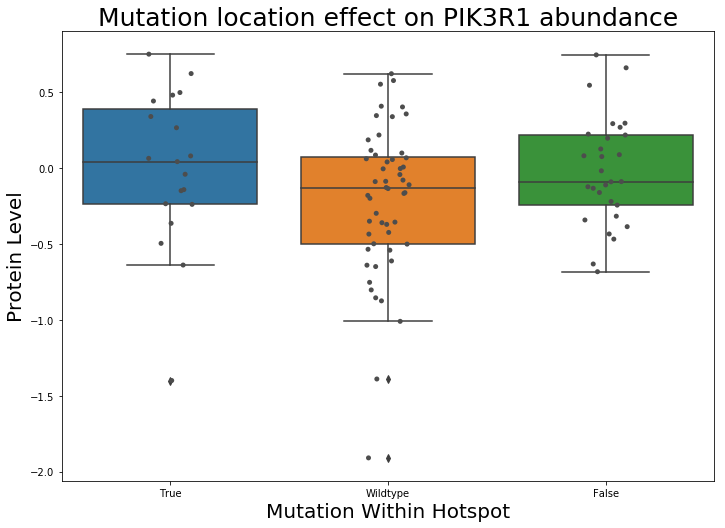

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on PIK3R1 abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

# Phosphoproteomic Abundance

In [12]:
phos_mutations = CPTAC.compare_mutations(phos, protein, gene)
phos_mutations['Within_Hotspot'] = False
phos_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True

phos_mutations.loc[phos_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
#print(phos_mutations)


phos_mutations = phos_mutations.loc[phos_mutations['Patient_Type'] == 'Tumor']
#phos_mutations = phos_mutations.dropna(axis = 0)
#print(phos_mutations)
phos_sites = list(phos_mutations)
phos_sites = phos_sites[:(len(phos_sites) - 3)]

In [13]:
sitedf = CPTAC.compare_mutations(phos, 'IRS1-S1101', gene)
print(sitedf)

      IRS1-S1101           Mutation Patient_Type
S001     -0.2040  Missense_Mutation        Tumor
S002     -0.5840           Wildtype        Tumor
S003      0.4380  Missense_Mutation        Tumor
S004     -0.2660           Wildtype        Tumor
S005     -0.4640           Wildtype        Tumor
S006     -0.9885           Wildtype        Tumor
S007      0.8265           Wildtype        Tumor
S008     -0.3005           Wildtype        Tumor
S009     -0.2190  Missense_Mutation        Tumor
S010      0.1505  Missense_Mutation        Tumor
S011     -0.1270           Wildtype        Tumor
S012     -1.4150  Missense_Mutation        Tumor
S013     -0.9170           Wildtype        Tumor
S014     -1.0545  Missense_Mutation        Tumor
S015      0.1050           Wildtype        Tumor
S016     -0.2530           Wildtype        Tumor
S017     -1.6345           Wildtype        Tumor
S018      0.6350  Missense_Mutation        Tumor
S019      1.5825           Wildtype        Tumor
S020      0.6280    

## Hotspot mutation vs non-hotspot mutation

In [14]:
p_values = []
site_names = []

for site in phos_sites:
    #mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    mutated_list = CPTAC.compare_mutations(phos, site, gene)

    if (site is not 'Mutation'):
        sitedf = CPTAC.compare_mutations(phos, site, gene)
        sitedf['Within_Hotspot'] = False
        sitedf.loc[hotspot_patients, 'Within_Hotspot'] = True

        sitedf.loc[sitedf['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
        #print(phos_mutations)
        sitedf = sitedf.loc[sitedf['Patient_Type'] == 'Tumor']
        print(sitedf)
        
        mutateddf = sitedf.loc[sitedf['Within_Hotspot'] != 'Wildtype' ].dropna(axis=0)
        wtdf = sitedf.loc[sitedf['Within_Hotspot'] == 'Wildtype'].dropna(axis=0)
        ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
        p_values.append(ttest[1])
        site_names.append(site) 
    
#We need to remove all 'nan' p-values and their corresponding site names before passing it in for the fdr correction
indexesToRemove=[]

for index in range(0, len(p_values)):
    if np.isnan(p_values[index]):
        indexesToRemove.append(index)

for rem in range( len(indexesToRemove)-1, -1, -1):
    p_values.pop(indexesToRemove[rem])
    site_names.pop(indexesToRemove[rem])
#p_values and site names have now had all entries removed where the corresponding p-value is 'nan'
        

pvalues = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[1]         
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[0]

significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

      PIK3R1-S154           Mutation Patient_Type Within_Hotspot
S001     -0.19300  Missense_Mutation        Tumor           True
S002      0.80500           Wildtype        Tumor       Wildtype
S003          NaN  Missense_Mutation        Tumor           True
S004      0.00393           Wildtype        Tumor       Wildtype
S005     -0.76100           Wildtype        Tumor       Wildtype
S006     -0.15600           Wildtype        Tumor       Wildtype
S007     -0.74600           Wildtype        Tumor       Wildtype
S008     -0.88400           Wildtype        Tumor       Wildtype
S009     -0.79800  Missense_Mutation        Tumor           True
S010     -0.51000  Missense_Mutation        Tumor          False
S011          NaN           Wildtype        Tumor       Wildtype
S012      1.17000  Missense_Mutation        Tumor          False
S013     -0.32500           Wildtype        Tumor       Wildtype
S014      1.32000  Missense_Mutation        Tumor          False
S015      0.58300        

      PIK3R1-T86           Mutation Patient_Type Within_Hotspot
S001         NaN  Missense_Mutation        Tumor           True
S002         NaN           Wildtype        Tumor       Wildtype
S003         NaN  Missense_Mutation        Tumor           True
S004         NaN           Wildtype        Tumor       Wildtype
S005         NaN           Wildtype        Tumor       Wildtype
S006         NaN           Wildtype        Tumor       Wildtype
S007         NaN           Wildtype        Tumor       Wildtype
S008         NaN           Wildtype        Tumor       Wildtype
S009         NaN  Missense_Mutation        Tumor           True
S010         NaN  Missense_Mutation        Tumor          False
S011         NaN           Wildtype        Tumor       Wildtype
S012         NaN  Missense_Mutation        Tumor          False
S013         NaN           Wildtype        Tumor       Wildtype
S014         NaN  Missense_Mutation        Tumor          False
S015         NaN           Wildtype     

      PIK3R1-Y580           Mutation Patient_Type Within_Hotspot
S001     -0.44300  Missense_Mutation        Tumor           True
S002      0.14500           Wildtype        Tumor       Wildtype
S003          NaN  Missense_Mutation        Tumor           True
S004          NaN           Wildtype        Tumor       Wildtype
S005          NaN           Wildtype        Tumor       Wildtype
S006     -1.24000           Wildtype        Tumor       Wildtype
S007      0.00408           Wildtype        Tumor       Wildtype
S008          NaN           Wildtype        Tumor       Wildtype
S009          NaN  Missense_Mutation        Tumor           True
S010     -0.76700  Missense_Mutation        Tumor          False
S011          NaN           Wildtype        Tumor       Wildtype
S012          NaN  Missense_Mutation        Tumor          False
S013          NaN           Wildtype        Tumor       Wildtype
S014          NaN  Missense_Mutation        Tumor          False
S015          NaN        

In [15]:
p_values = []
site_names = []

for site in phos_sites:
    #mutated = phos_mutations.loc[phos_mutations['Within_Hotspot'] == True]
    #mutated_list = CPTAC.compare_mutations(phos, site, gene)

    if (site is not 'Mutation'):
        sitedf = CPTAC.compare_mutations(phos, site, gene)
        
        sitedf = sitedf.loc[sitedf['Patient_Type'] == 'Tumor']
        #print(sitedf)
        sitedf['Within_Hotspot'] = False
        sitedf.loc[hotspot_patients, 'Within_Hotspot'] = True

        sitedf.loc[sitedf['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
        #print(sitedf)
        #print(phos_mutations)
        
        
        mutateddf = sitedf.loc[sitedf['Within_Hotspot'] != 'Wildtype' ].dropna(axis=0)
        #print(mutateddf)
        wtdf = sitedf.loc[sitedf['Within_Hotspot'] == 'Wildtype'].dropna(axis=0)
        
        #print(mutateddf)
        ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
        print(site, " ", ttest)
        p_values.append(ttest[1])
        site_names.append(site) 
    
#We need to remove all 'nan' p-values and their corresponding site names before passing it in for the fdr correction
indexesToRemove=[]

for index in range(0, len(p_values)):
    if np.isnan(p_values[index]):
        indexesToRemove.append(index)

for rem in range( len(indexesToRemove)-1, -1, -1):
    p_values.pop(indexesToRemove[rem])
    site_names.pop(indexesToRemove[rem])
#p_values and site names have now had all entries removed where the corresponding p-value is 'nan'
        

pvalues = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[1]         
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[0]

significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

PIK3R1-S154   Ttest_indResult(statistic=0.5124860840155101, pvalue=0.6097407831622976)
PIK3R1-S690   Ttest_indResult(statistic=-0.791852410390637, pvalue=0.4727583765315748)
PIK3R1-S83   Ttest_indResult(statistic=-0.8935329373870402, pvalue=0.4125099460571472)
PIK3R1-T86   Ttest_indResult(statistic=1.766831017835616, pvalue=0.1375078235051913)
PIK3R1-Y452   Ttest_indResult(statistic=-1.6330850747267744, pvalue=0.11116835461228924)
PIK3R1-Y556   Ttest_indResult(statistic=-1.8766080066316169, pvalue=0.0760172814628358)
PIK3R1-Y580   Ttest_indResult(statistic=-0.7243415003598416, pvalue=0.4761603716138516)
[]
[]
{}


## Hotspot mutation vs other mutations and wildtype

In [16]:
sites = phos.columns
p_values = []
site_names = []
phosProtList = ['IRS1']

alpha = 0.05
p_value = alpha/len(phosProtList)


for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                p_values.append(ttest[1])
                site_names.append(site)     
                
#We need to remove all 'nan' p-values and their corresponding site names before passing it in for the fdr correction
indexesToRemove=[]

for index in range(0, len(p_values)):
    if np.isnan(p_values[index]):
        indexesToRemove.append(index)

for rem in range( len(indexesToRemove)-1, -1, -1):
    p_values.pop(indexesToRemove[rem])
    site_names.pop(indexesToRemove[rem])
#p_values and site names have now had all entries removed where the corresponding p-value is 'nan'
        

pvalues = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[1]         
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[0]

significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['IRS1-S1005' 'IRS1-S1100' 'IRS1-S1101' 'IRS1-S1133' 'IRS1-S1134'
 'IRS1-S270' 'IRS1-S307' 'IRS1-S323' 'IRS1-S330' 'IRS1-S337' 'IRS1-S341'
 'IRS1-S374' 'IRS1-S415' 'IRS1-S527' 'IRS1-S531' 'IRS1-S629' 'IRS1-S636'
 'IRS1-S672' 'IRS1-S766' 'IRS1-T305' 'IRS1-T309' 'IRS1-T530']
[0.0094718  0.00020188 0.000523   0.01426172 0.0011596  0.00118185
 0.0481304  0.01005825 0.0094718  0.02559819 0.0481304  0.00118185
 0.00290455 0.01092095 0.00195889 0.00091668 0.00248824 0.0094718
 0.00248824 0.00248824 0.0094718  0.02461594]
{'IRS1-S1005': 0.0094717950390731, 'IRS1-S1100': 0.0002018777834901376, 'IRS1-S1101': 0.0005229979400382523, 'IRS1-S1133': 0.014261718949464484, 'IRS1-S1134': 0.0011595956105361492, 'IRS1-S270': 0.0011818527960791446, 'IRS1-S307': 0.04813039926788787, 'IRS1-S323': 0.010058250340791101, 'IRS1-S330': 0.0094717950390731, 'IRS1-S337': 0.02559819374662789, 'IRS1-S341': 0.04813039926788787, 'IRS1-S374': 0.0011818527960791446, 'IRS1-S415': 0.002904550128402398, 'IRS1-S527': 0.010920

## All mutations vs wildtype

In [17]:
sites = phos.columns
p_values = []
site_names = []
phosProtList = ['IRS1']

alpha = 0.05
p_value = alpha/len(phosProtList)


for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                p_values.append(ttest[1])
                site_names.append(site)     
                
#We need to remove all 'nan' p-values and their corresponding site names before passing it in for the fdr correction
indexesToRemove=[]

for index in range(0, len(p_values)):
    if np.isnan(p_values[index]):
        indexesToRemove.append(index)

for rem in range( len(indexesToRemove)-1, -1, -1):
    p_values.pop(indexesToRemove[rem])
    site_names.pop(indexesToRemove[rem])
#p_values and site names have now had all entries removed where the corresponding p-value is 'nan'
        

pvalues = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[1]         
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[0]

significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

['IRS1-S1005' 'IRS1-S1100' 'IRS1-S1101' 'IRS1-S1133' 'IRS1-S1134'
 'IRS1-S270' 'IRS1-S307' 'IRS1-S323' 'IRS1-S330' 'IRS1-S337' 'IRS1-S341'
 'IRS1-S374' 'IRS1-S415' 'IRS1-S527' 'IRS1-S531' 'IRS1-S629' 'IRS1-S636'
 'IRS1-S672' 'IRS1-S766' 'IRS1-T305' 'IRS1-T309' 'IRS1-T530']
[0.0094718  0.00020188 0.000523   0.01426172 0.0011596  0.00118185
 0.0481304  0.01005825 0.0094718  0.02559819 0.0481304  0.00118185
 0.00290455 0.01092095 0.00195889 0.00091668 0.00248824 0.0094718
 0.00248824 0.00248824 0.0094718  0.02461594]
{'IRS1-S1005': 0.0094717950390731, 'IRS1-S1100': 0.0002018777834901376, 'IRS1-S1101': 0.0005229979400382523, 'IRS1-S1133': 0.014261718949464484, 'IRS1-S1134': 0.0011595956105361492, 'IRS1-S270': 0.0011818527960791446, 'IRS1-S307': 0.04813039926788787, 'IRS1-S323': 0.010058250340791101, 'IRS1-S330': 0.0094717950390731, 'IRS1-S337': 0.02559819374662789, 'IRS1-S341': 0.04813039926788787, 'IRS1-S374': 0.0011818527960791446, 'IRS1-S415': 0.002904550128402398, 'IRS1-S527': 0.010920

## Hotspot mutation v wildtype

In [18]:
p_values = []
site_names = []


for site in phos_sites:   
    if (site is not 'Mutation'):
        sitedf = CPTAC.compare_mutations(phos, site, gene)
        sitedf = sitedf.loc[sitedf['Patient_Type'] == 'Tumor']
        sitedf['Within_Hotspot'] = False
        sitedf.loc[hotspot_patients, 'Within_Hotspot'] = True
        sitedf.loc[sitedf['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
        mutateddf = sitedf.loc[sitedf['Within_Hotspot'] == True].dropna(axis=0)
        wtdf = sitedf.loc[sitedf['Within_Hotspot'] == 'Wildtype'].dropna(axis=0)
        ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
        p_values.append(ttest[1])
        site_names.append(site)
    
    
#We need to remove all 'nan' p-values and their corresponding site names before passing it in for the fdr correction
indexesToRemove=[]

for index in range(0, len(p_values)):
    if np.isnan(p_values[index]):
        indexesToRemove.append(index)

for rem in range( len(indexesToRemove)-1, -1, -1):
    p_values.pop(indexesToRemove[rem])
    site_names.pop(indexesToRemove[rem])
#p_values and site names have now had all entries removed where the corresponding p-value is 'nan'
        

pvalues = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[1]         
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values,alpha=0.05, method='indep')[0]

significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

[]
[]
{}
